## Nome - RA
Éric Fadul - 148143

Tayenne Euqueres - 150086

William Oliveira - 150382

## Datasets disponíveis em:

https://drive.google.com/drive/folders/1r2sNrq3KGnuiNm8Ep7j7dO8RQU6uxksW?usp=sharing

# Entendendo o Funcionamento da Classe MLP

## O Que é a Classe MLP?

A classe **MLP** (Multi-Layer Perceptron) implementa uma rede neural totalmente conectada com múltiplas camadas, permitindo resolver problemas de classificação binária, multiclasse ou regressão. A rede é configurada a partir de um conjunto de camadas, cada uma com um número de neurônios definido, e utiliza funções de ativação e de perda selecionáveis. Além disso, conta com mecanismo de momentum no ajuste dos parâmetros, o que pode acelerar a convergência.

## Principais Atributos e Parâmetros

- **layers**: Lista com o número de neurônios em cada camada (incluindo entrada e saída).
- **activation**: Função de ativação para as camadas ocultas (por exemplo, ReLU, sigmoid, tanh, linear).
- **output_activation**: Função de ativação para a camada de saída (por exemplo, sigmoid, softmax ou linear).
- **loss_function**: Função de perda utilizada no treinamento (por exemplo, binary_cross_entropy, mean_squared_error, category_cross_entropy).
- **learning_rate**: Taxa de aprendizado utilizada na atualização dos pesos.
- **momentum**: Hiperparâmetro que controla a influência do histórico dos gradientes na atualização dos pesos, tornando o treinamento mais estável e muitas vezes mais rápido.
- **parameters**: Dicionário que armazena os pesos (`W`) e biases (`b`) de cada camada.
- **velocities**: Dicionário que armazena as velocidades dos pesos (`vW`) e biases (`vb`) para aplicar o momentum.
- **loss_history**: Lista que armazena o histórico da perda ao longo das épocas de treinamento.

---

## Funções Implementadas

### 1. `__init__`  
Inicializa a MLP com base nos parâmetros fornecidos.  
- Define as funções de ativação e perda.
- Ajusta a taxa de aprendizado e o momentum.
- Inicializa os parâmetros (pesos e biases) de acordo com a função de ativação. Para ReLU, utiliza a inicialização de He; para sigmoid, tanh, linear e softmax, utiliza a inicialização de Xavier.
- Cria os dicionários de velocidades para os pesos e biases, usados no momentum.
- Prepara um histórico de perda para monitorar o desempenho do modelo ao longo do treinamento.

### 2. `_initialize_parameters`  
Inicializa pesos e biases para cada camada:  
- Para **ReLU**: Utiliza a inicialização de He, considerando a variância dos dados de entrada.
- Para **sigmoid**, **tanh**, **linear** e **softmax**: Utiliza a inicialização de Xavier, ajustando a escala conforme o número de neurônios da camada anterior.  
Todos os bias começam como zero.

### 3. `_initialize_velocities`  
Inicializa as velocidades (vW e vb) em zero. Esses valores são atualizados a cada passo do gradiente, permitindo a aplicação de momentum na atualização dos parâmetros.

### 4. `_activation_function`  
Aplica a função de ativação desejada em cada camada:  
- **ReLU**: `max(0, Z)`
- **Sigmoid**: `1 / (1 + e^(-Z))`
- **tanh**: `tanh(Z)`
- **Linear**: `Z`
- **Softmax**: Converte logits em probabilidades normalizadas.

### 5. `_activation_derivative`  
Calcula a derivada da função de ativação:  
- **ReLU**: 1 para Z > 0 e 0 caso contrário.
- **Sigmoid**: A*(1-A)
- **tanh**: 1 - tanh²(Z)
- **Linear**: 1
- **Softmax**: A*(1-A)

### 6. `_forward_propagation`  
Executa a passagem de dados da entrada até a saída:  
- Calcula `Z = W*A + b` para cada camada.
- Aplica a função de ativação correspondente.
- Armazena valores intermediários (`Z` e `A`) em `caches` para uso na retropropagação.

### 7. `_compute_loss`  
Calcula a perda entre as previsões (Y_hat) e os alvos (Y):  
- **binary_cross_entropy**: Entropia cruzada binária.
- **mean_squared_error (MSE)**: Erro quadrático médio, comum em regressão.
- **category_cross_entropy**: Entropia cruzada para classificação multiclasse.

### 8. `_compute_loss_derivative`  
Calcula a derivada da função de perda:  
- Para entropia cruzada, o gradiente geralmente é `(Y_hat - Y)`.
- Para MSE, o gradiente é `(Y_hat - Y)`.

### 9. `_backward_propagation`  
Executa a retropropagação:  
- Usa a derivada da perda em relação a `A` (dA).
- Calcula `dZ` utilizando a derivada da função de ativação.
- Obtém `dW` e `db`.
- Propaga `dA` para a camada anterior, repetindo até chegar à primeira camada.

### 10. `_update_parameters`  
Atualiza pesos e biases com gradiente descendente e momentum:  
- Calcula velocidades (vW, vb) usando o momentum.
- Atualiza W e b considerando as velocidades e a taxa de aprendizado.

### 11. `train`  
Treina a rede por múltiplas épocas:  
- A cada época, executa forward, calcula perda, faz backward e atualiza parâmetros.
- Armazena a perda no histórico.
- Pode imprimir a perda a cada 100 épocas para monitorar a convergência.

### 12. `predict`  
Faz previsões após o treinamento:  
- Executa forward nos dados de entrada.
- Para **softmax**: Retorna a classe com maior probabilidade.
- Para **sigmoid**: Retorna 0 ou 1.
- Para **linear**: Retorna valores contínuos.

---

## Conclusão

A implementação da classe MLP é um arcabouço versátil para construir e treinar redes neurais totalmente conectadas. Ao combinar diferentes funções de ativação, perda e momentum, o modelo pode ser adaptado a uma ampla gama de problemas. A separação clara das etapas (inicialização, propagação para frente, cálculo de perda, retropropagação, atualização de parâmetros) torna o código fácil de compreender, manter e aprimorar.


In [107]:
#Inicialização de bibliotecas
import numpy as np #Numpy utilizado para manipulação de vetores e matrizes
import pandas as pd #Pandas utilizado para manipulação de dados
from sklearn.model_selection import train_test_split #SKLearn utilizado para dividir o dataset em treino e teste
from sklearn.preprocessing import StandardScaler, MinMaxScaler #SKLearn utilizado para normalizar os dados
from sklearn.metrics import accuracy_score, balanced_accuracy_score #SKLearn utilizado para calcular a acurácia
from sklearn.model_selection import GridSearchCV #SKLearn utilizado para realizar a busca em grade
import matplotlib.pyplot as plt #Matplotlib utilizado para plotar gráficos

In [108]:
#Criação da classe MLP e definição de suas funções

class MLP:
    #Inicialização da classe
    def __init__(self, layers, activation='relu', output_activation='sigmoid', loss_function='binary_cross_entropy', learning_rate=0.01, momentum=0.9): # Definição dos parametros default
        self.layers = layers # Número de neurônios em cada camada
        self.activation = activation # Função de ativação
        self.output_activation = output_activation # Função de ativação da última camada
        self.loss_function = loss_function # Função de perda
        self.learning_rate = learning_rate # Taxa de aprendizado
        self.momentum = momentum # Valor do momentum
        self.parameters = self._initialize_parameters() # Inicialização dos parâmetros
        self.velocities = self._initialize_velocities() # Inicialização dos velocidades
        self.loss_history = [] # Histórico de perda
    
    #Inicialização dos parâmetros
    def _initialize_parameters(self):
        parameters = {}
        np.random.seed(42)  # Set seed for reproducibility
        
        match self.activation:  # Utiliza o match para selecionar a função de ativação
            case 'relu': # Caso a função de ativação seja relu
                for l in range(1, len(self.layers)):
                    parameters['W' + str(l)] = np.random.randn(self.layers[l], self.layers[l-1]) * np.sqrt(1 / self.layers[l-1]) # Inicializa os pesos com a inicialização de He
                    parameters['b' + str(l)] = np.zeros((self.layers[l], 1))
                return parameters
            case 'sigmoid' | 'tanh' | 'linear' | 'softmax': # Caso a função de ativação seja sigmoid, tanh, linear ou softmax
                for l in range(1, len(self.layers)):
                    parameters['W' + str(l)] = np.random.randn(self.layers[l], self.layers[l-1]) * np.sqrt(2 / self.layers[l-1]) # Inicializa os pesos com a inicialização de Xavier
                    parameters['b' + str(l)] = np.zeros((self.layers[l], 1))
                return parameters
            case _: # Caso a função de ativação não seja definida
                raise ValueError("Unsupported activation function for weight initialization.") # Retorna um erro se a função de ativação não estiver definida

    #Inicialização dos velocidades
    def _initialize_velocities(self): 
        velocities = {}
        for l in range(1, len(self.layers)): # Loop começa em 1 para ignorar a camada de input
            velocities['vW' + str(l)] = np.zeros_like(self.parameters['W' + str(l)]) # Inicializa as velocidades dos pesos
            velocities['vb' + str(l)] = np.zeros_like(self.parameters['b' + str(l)]) # Inicializa as velocidades dos bias
        return velocities
    
    #Função de ativação
    def _activation_function(self, Z, function_type):
        match function_type: # Utiliza o match para selecionar a função de ativação
            case 'relu':
                return np.maximum(0, Z) # Retorna o valor de Z se for maior que zero, caso contrário, retorna zero
            case 'sigmoid':
                return 1 / (1 + np.exp(-Z)) # Retorna o valor da função sigmoid
            case 'tanh':
                return np.tanh(Z) # Retorna o valor da função tanh
            case 'linear': 
                return Z # Retorna o valor de Z
            case 'softmax':
                exps = np.exp(Z - np.max(Z, axis=0, keepdims=True)) # Evita estouro numérico
                return exps / np.sum(exps, axis=0, keepdims=True) # Retorna o valor da função softmax
            case _:
                raise ValueError("Unsupported activation function") # Retorna um erro se a função de ativação não estiver definida
    
    #Derivada da função de ativação
    def _activation_derivative(self, Z, function_type):
        match function_type: # Utiliza o match para selecionar a derivada da função de ativação
            case 'relu':
                return np.where(Z > 0, 1, 0) # Derivada da função relu
            case 'sigmoid':
                A = self._activation_function(Z, 'sigmoid')
                return A * (1 - A) # Derivada da função sigmoid
            case 'tanh':
                return 1 - np.tanh(Z) ** 2 # Derivada da função tanh
            case 'linear':
                return np.ones_like(Z) # Derivada da função linear
            case 'softmax':
                A = self._activation_function(Z, 'softmax')
                return A * (1 - A) # Derivada da função softmax
            case _:
                raise ValueError("Unsupported activation function derivative") # Retorna um erro se a derivada da função de ativação não estiver definida
    
    #Propagação para frente
    def _forward_propagation(self, X):
        caches = {} # Dicionário para armazenar os valores de Z e A
        A = X # A0 = X
        caches['A0'] = X # Armazena o valor de X
        L = len(self.parameters) // 2 # Número de camadas
        
        for l in range(1, L + 1): # Loop começa em 1 para ignorar a camada de input
            W = self.parameters['W' + str(l)] # Pega os pesos da camada l
            b = self.parameters['b' + str(l)] # Pega os bias da camada l
            Z = np.dot(W, A) + b # Calcula Z = W * A + b
            caches['Z' + str(l)] = Z # Armazena o valor de Z
            if l == L: # Se for a última camada
                A = self._activation_function(Z, self.output_activation) # Calcula a ativação da última camada
            else: # Se não for a última camada
                A = self._activation_function(Z, self.activation) # Calcula a ativação da camada l
            caches['A' + str(l)] = A # Armazena o valor de A
        return A, caches # Retorna o valor de A e os valores de Z e A
    
    #Cálculo da perda
    def _compute_loss(self, Y_hat, Y):
        m = Y.shape[1] # Número de exemplos
        match self.loss_function: # Utiliza o match para selecionar a função de perda
            case 'binary_cross_entropy':
                epsilon = 1e-8 # Valor pequeno para evitar divisão por zero
                loss = -1 / m * np.sum(Y * np.log(Y_hat + epsilon) + (1 - Y) * np.log(1 - Y_hat + epsilon)) # Cálculo da perda por entropia cruzada
            case 'mean_squared_error':
                loss = 1 / (2 * m) * np.sum((Y_hat - Y) ** 2) # Cálculo da perda por erro quadrático médio
            case 'category_cross_entropy':
                epsilon = 1e-8 # Valor pequeno para evitar divisão por zero
                loss = -1 / m * np.sum(Y * np.log(Y_hat + epsilon)) # Cálculo da perda por entropia cruzada categórica
            case _:
                raise ValueError("Unsupported loss function") # Retorna um erro se a função de perda não estiver definida
        return loss
    
    #Cálculo da derivada da perda
    def _compute_loss_derivative(self, Y_hat, Y):
        match self.loss_function: # Utiliza o match para selecionar a derivada da função de perda
            case 'binary_cross_entropy':
                return - (np.divide(Y, Y_hat + 1e-8) - np.divide(1 - Y, 1 - Y_hat + 1e-8)) # Derivada da entropia cruzada
            case 'mean_squared_error':
                return Y_hat - Y # Derivada do erro quadrático médio
            case 'category_cross_entropy':
                return Y_hat - Y # Derivada da entropia cruzada categórica
            case _:
                raise ValueError("Unsupported loss function") # Retorna um erro se a derivada da função de perda não estiver definida
    
    #Propagação para trás
    def _backward_propagation(self, Y_hat, Y, caches):
        grads = {} # Dicionário para armazenar os gradientes
        m = Y.shape[1] # Número de exemplos
        L = len(self.parameters) // 2 # Número de camadas
        Y = Y.reshape(Y_hat.shape) # Redimensiona Y para o mesmo formato de Y_hat
        
        dA = self._compute_loss_derivative(Y_hat, Y) # Calcula a derivada da função de perda
        
        for l in reversed(range(1, L + 1)): # Loop começa em 1 para ignorar a camada de input
            A_prev = caches['A' + str(l - 1)] # Pega o valor de A da camada anterior
            Z = caches['Z' + str(l)] # Pega o valor de Z
            W = self.parameters['W' + str(l)] # Pega os pesos
            
            if l == L: # Se for a última camada
                activation_derivative = self._activation_derivative(Z, self.output_activation) # Calcula a derivada da ativação da última camada
                dZ = dA * activation_derivative # Calcula a derivada de Z
            else: # Se não for a última camada
                activation_derivative = self._activation_derivative(Z, self.activation) # Calcula a derivada da ativação da camada l
                dZ = dA * activation_derivative # Calcula a derivada de Z
            
            dW = (1 / m) * np.dot(dZ, A_prev.T) # Calcula a derivada dos pesos
            db = (1 / m) * np.sum(dZ, axis=1, keepdims=True) # Calcula a derivada dos bias
            
            grads['dW' + str(l)] = dW # Armazena a derivada dos pesos
            grads['db' + str(l)] = db # Armazena a derivada dos bias
            
            dA = np.dot(W.T, dZ) # Calcula a derivada de A para a próxima iteração
        
        return grads # Retorna os gradientes
    
    #Atualização dos parâmetros
    def _update_parameters(self, grads):
        L = len(self.parameters) // 2 # Número de camadas
        for l in range(1, L + 1): # Loop começa em 1 para ignorar a camada de input
            self.velocities['vW' + str(l)] = self.momentum * self.velocities['vW' + str(l)] + grads['dW' + str(l)] # Atualiza as velocidades dos pesos
            self.velocities['vb' + str(l)] = self.momentum * self.velocities['vb' + str(l)] + grads['db' + str(l)] # Atualiza as velocidades dos bias
           
            self.parameters['W' + str(l)] -= self.learning_rate * self.velocities['vW' + str(l)] # Atualiza os pesos
            self.parameters['b' + str(l)] -= self.learning_rate * self.velocities['vb' + str(l)] # Atualiza os bias
    
    #Treinamento da rede
    def train(self, X, Y, epochs=1000, print_loss=False):
        for epoch in range(epochs): # Loop de treinamento
            Y_hat, caches = self._forward_propagation(X) # Propagação para frente
            loss = self._compute_loss(Y_hat, Y) # Cálculo da perda
            self.loss_history.append(loss) # Armazena a perda
            grads = self._backward_propagation(Y_hat, Y, caches) # Propagação para trás
            self._update_parameters(grads) # Atualiza os parâmetros
            
            if print_loss and (epoch + 1) % 100 == 0: # Imprime a época e a perda a cada 100 épocas
                print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}") 
    
    #Predição
    def predict(self, X):
        Y_hat, _ = self._forward_propagation(X) # Propagação para frente
        match self.output_activation: # Utiliza o match para selecionar a função de ativação da última camada
            case 'softmax':
                predictions = np.argmax(Y_hat, axis=0) # Retorna o índice do maior valor
            case 'sigmoid':
                predictions = (Y_hat > 0.5).astype(int) # Converte os valores de Y_hat para 0 ou 1
            case 'linear':
                predictions = Y_hat # Mantém os valores de Y_hat
            case _:
                raise ValueError("Unsupported output activation function") # Retorna um erro se a função de ativação não estiver definida
        return predictions

# Visão Geral do Dataset: Iris Dataset

## Informações Gerais
- **Número de Linhas**: 150
- **Número de Colunas**: 6
- **Nomes das Colunas**:
  - `Id`
  - `SepalLengthCm`
  - `SepalWidthCm`
  - `PetalLengthCm`
  - `PetalWidthCm`
  - `Species`
- **Tipos de Dados**:
  - `Id`: int64
  - `SepalLengthCm`: float64
  - `SepalWidthCm`: float64
  - `PetalLengthCm`: float64
  - `PetalWidthCm`: float64
  - `Species`: object

## Qualidade dos Dados
- **Valores Ausentes**:
  - Nenhuma coluna contém valores ausentes.

## Estatísticas Descritivas
| Coluna             | Média | Desvio Padrão | Mínimo | 25%   | Mediana | 75%   | Máximo |
|--------------------|-------|---------------|--------|-------|---------|-------|--------|
| SepalLengthCm     | 5.84  | 0.83          | 4.30   | 5.10  | 5.80    | 6.40  | 7.90   |
| SepalWidthCm      | 3.05  | 0.43          | 2.00   | 2.80  | 3.00    | 3.30  | 4.40   |
| PetalLengthCm     | 3.76  | 1.76          | 1.00   | 1.60  | 4.35    | 5.10  | 6.90   |
| PetalWidthCm      | 1.20  | 0.76          | 0.10   | 0.30  | 1.30    | 1.80  | 2.50   |

## Resumo
O dataset contém informações sobre o comprimento e largura das pétalas e sépalas de flores de diferentes espécies de Iris. Ele está limpo, sem valores ausentes, e apresenta variações nos atributos medidos. As estatísticas descritivas fornecem uma visão geral das distribuições dos dados.


In [109]:
df = pd.read_csv('iris.csv') # Carrega o dataset
df = df.drop('Id', axis=1) # Remove a coluna Id
df.info() # Mostra informações sobre o dataset
df['Species'].value_counts() # Mostra a contagem de cada espécie

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [110]:
unique_species = df['Species'].unique() # Pega as espécies únicas
species_mapping = {species: i for i, species in enumerate(unique_species)} # Mapeia as espécies para valores numéricos
df['Species'] = df['Species'].map(species_mapping) # Mapeia as espécies
df.head() # Mostra as primeiras linhas do dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [111]:
X = df.iloc[:, :-1].values # Pega os valores das features
y = df.iloc[:, -1].values.reshape(1, -1).T # Pega os valores do target

print(X.shape) # Mostra a forma de X
print(y.shape) # Mostra a forma de y

(150, 4)
(150, 1)


In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Divide o dataset em treino e teste, utilizando stratify para manter a proporção das classes
scaler = StandardScaler() # Inicializa o normalizador
X_train = scaler.fit_transform(X_train) # Normaliza os dados de treino
X_test = scaler.transform(X_test) # Normaliza os dados de teste

print(X_train.shape) # Mostra a forma de X_train
print(X_test.shape) # Mostra a forma de X_test
print(y_train.shape) # Mostra a forma de y_train
print(y_test.shape) # Mostra a forma de y_test

print(X_train[0:5]) # Mostra as primeiras linhas de X_train
print(y_train[0:5]) # Mostra as primeiras linhas de y_train

unique, counts = np.unique(y_train, return_counts=True) # Conta a quantidade de cada classe em y_train
unique = [int(val) for val in unique] # Converte os valores únicos para inteiros
counts = [int(val) for val in counts] # Converte as contagens para inteiros
print("Contagem de cada classe em y_train:", dict(zip(unique, counts))) # Mostra a contagem de cada classe em y_train para verificar se a divisão foi feita corretamente

(120, 4)
(30, 4)
(120, 1)
(30, 1)
[[-1.72156775 -0.32483982 -1.34703555 -1.32016847]
 [-1.12449223 -1.22612948  0.41429037  0.65186742]
 [ 1.14439475 -0.55016223  0.58474127  0.25746024]
 [-1.12449223  0.12580502 -1.29021859 -1.45163753]
 [-0.40800161 -1.22612948  0.13020555  0.12599118]]
[[0]
 [2]
 [1]
 [0]
 [1]]
Contagem de cada classe em y_train: {0: 40, 1: 40, 2: 40}


In [113]:
y_train = np.eye(len(unique_species))[y_train.flatten()] # Transforma y_train em one-hot encoding para utilizar na rede neural
print(y_train.shape) # Mostra a forma de y_train

(120, 3)


In [114]:
# Treino do primeiro modelo para verificar se a implementação está correta
model = MLP(layers=[4, 8, 3], activation='relu', output_activation='softmax', loss_function='category_cross_entropy', learning_rate=0.15, momentum=0.9) # Inicializa o modelo para classificação multiclasse 
model.train(X_train.T, y_train.T, epochs=1000, print_loss=True) # Treina o modelo com os dados de treino
print('Acurácia:', accuracy_score(y_test, model.predict(X_test.T)) * 100,'%') # Calcula a acurácia

Epoch 100/1000, Loss: 0.1126
Epoch 200/1000, Loss: 0.0793
Epoch 300/1000, Loss: 0.0674
Epoch 400/1000, Loss: 0.0606
Epoch 500/1000, Loss: 0.0561
Epoch 600/1000, Loss: 0.0528
Epoch 700/1000, Loss: 0.0503
Epoch 800/1000, Loss: 0.0484
Epoch 900/1000, Loss: 0.0468
Epoch 1000/1000, Loss: 0.0455
Acurácia: 96.66666666666667 %


In [115]:
# Função para realizar a busca em grade
def grid_train_mlp_classification(grid_activation_function):
    parameter_sets = [ # Define os parâmetros para treinar vários modelos
        {"layers": [4, 32, 3], "learning_rate": 0.005, "momentum": 0.9},
        {"layers": [4, 16, 3], "learning_rate": 0.01, "momentum": 0.8},
        {"layers": [4, 8, 3], "learning_rate": 0.02, "momentum": 0.7},
        {"layers": [4, 32, 3], "learning_rate": 0.005, "momentum": 0.6},
        {"layers": [4, 16, 3], "learning_rate": 0.01, "momentum": 0.5},
        {"layers": [4, 8, 3], "learning_rate": 0.02, "momentum": 0.4}
    ] 

    print(f"Grid Search for Activation Function: {grid_activation_function}") # Imprime a função de ativação

    results = []

    plt.figure(figsize=(12, 8)) # Define o tamanho da figura

    for i, params in enumerate(parameter_sets):
        print(f"Training model {i+1} with parameters: {params}") # Imprime os parâmetros do modelo
        
        model = MLP( # Inicializa o modelo de acordo com os parâmetros definidos
            layers=params["layers"],
            activation=grid_activation_function,
            output_activation="softmax", # Função de ativação da última camada para classificação multiclasse
            loss_function="category_cross_entropy", # Função de perda para classificação multiclasse
            learning_rate=params["learning_rate"],
            momentum=params["momentum"]
        )
        
        model.train(X_train.T, y_train.T, epochs=1000, print_loss=False) # Treina o modelo
        
        y_pred = model.predict(X_test.T) # Faz a predição
        final_accuracy = accuracy_score(y_test, y_pred) * 100 # Calcula a acurácia
        
        results.append({ # Armazena os resultados
            "parameters": params,
            "loss_history": model.loss_history,
            "final_accuracy": final_accuracy
        })
        
        plt.plot(model.loss_history, label=f"Model {i+1} (Accuracy: {final_accuracy:.2f})", linewidth=2.5) # Plota o histórico de perda

    plt.title("Loss Function During Training using " + grid_activation_function) # Título do gráfico
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show() # Mostra o gráfico

Grid Search for Activation Function: relu
Training model 1 with parameters: {'layers': [4, 32, 3], 'learning_rate': 0.005, 'momentum': 0.9}
Training model 2 with parameters: {'layers': [4, 16, 3], 'learning_rate': 0.01, 'momentum': 0.8}
Training model 3 with parameters: {'layers': [4, 8, 3], 'learning_rate': 0.02, 'momentum': 0.7}
Training model 4 with parameters: {'layers': [4, 32, 3], 'learning_rate': 0.005, 'momentum': 0.6}
Training model 5 with parameters: {'layers': [4, 16, 3], 'learning_rate': 0.01, 'momentum': 0.5}
Training model 6 with parameters: {'layers': [4, 8, 3], 'learning_rate': 0.02, 'momentum': 0.4}


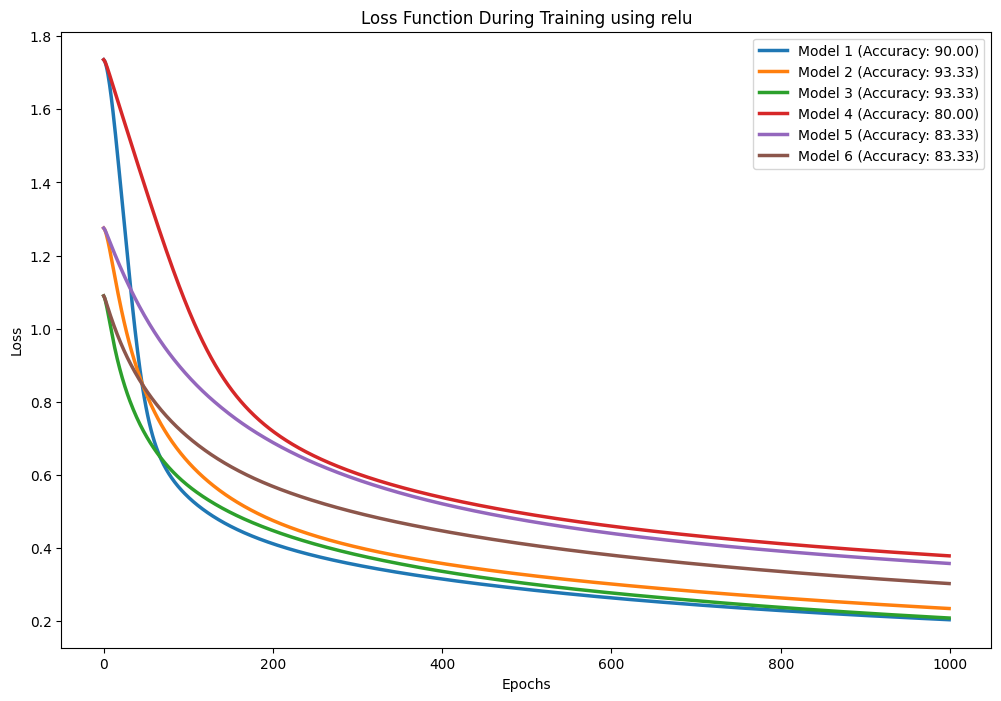

Grid Search for Activation Function: sigmoid
Training model 1 with parameters: {'layers': [4, 32, 3], 'learning_rate': 0.005, 'momentum': 0.9}
Training model 2 with parameters: {'layers': [4, 16, 3], 'learning_rate': 0.01, 'momentum': 0.8}
Training model 3 with parameters: {'layers': [4, 8, 3], 'learning_rate': 0.02, 'momentum': 0.7}
Training model 4 with parameters: {'layers': [4, 32, 3], 'learning_rate': 0.005, 'momentum': 0.6}
Training model 5 with parameters: {'layers': [4, 16, 3], 'learning_rate': 0.01, 'momentum': 0.5}
Training model 6 with parameters: {'layers': [4, 8, 3], 'learning_rate': 0.02, 'momentum': 0.4}


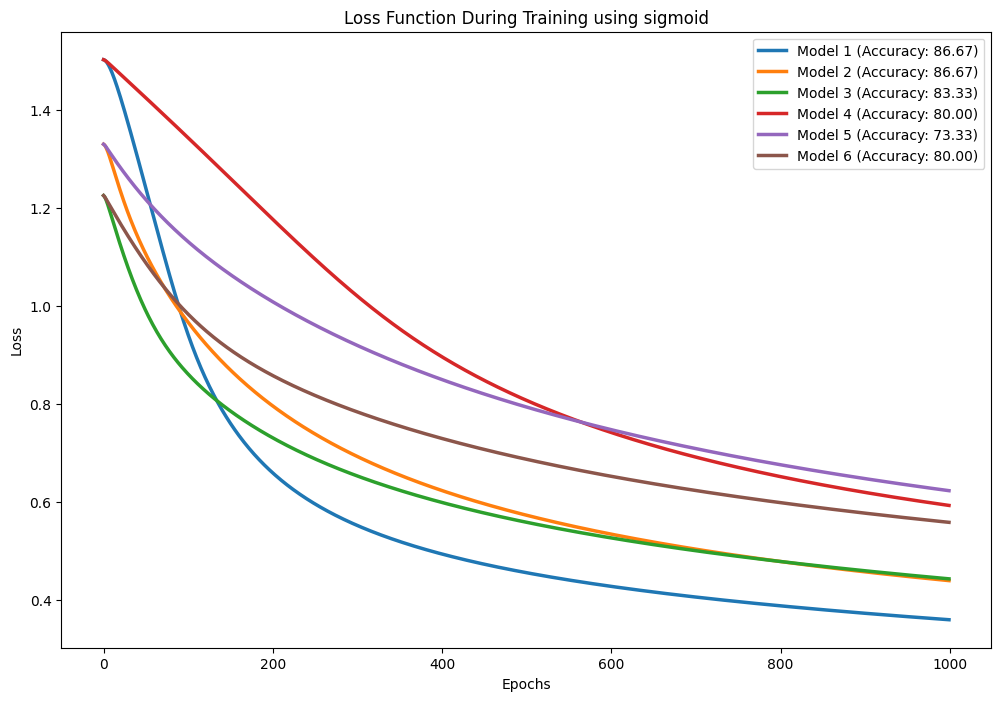

Grid Search for Activation Function: tanh
Training model 1 with parameters: {'layers': [4, 32, 3], 'learning_rate': 0.005, 'momentum': 0.9}
Training model 2 with parameters: {'layers': [4, 16, 3], 'learning_rate': 0.01, 'momentum': 0.8}
Training model 3 with parameters: {'layers': [4, 8, 3], 'learning_rate': 0.02, 'momentum': 0.7}
Training model 4 with parameters: {'layers': [4, 32, 3], 'learning_rate': 0.005, 'momentum': 0.6}
Training model 5 with parameters: {'layers': [4, 16, 3], 'learning_rate': 0.01, 'momentum': 0.5}
Training model 6 with parameters: {'layers': [4, 8, 3], 'learning_rate': 0.02, 'momentum': 0.4}


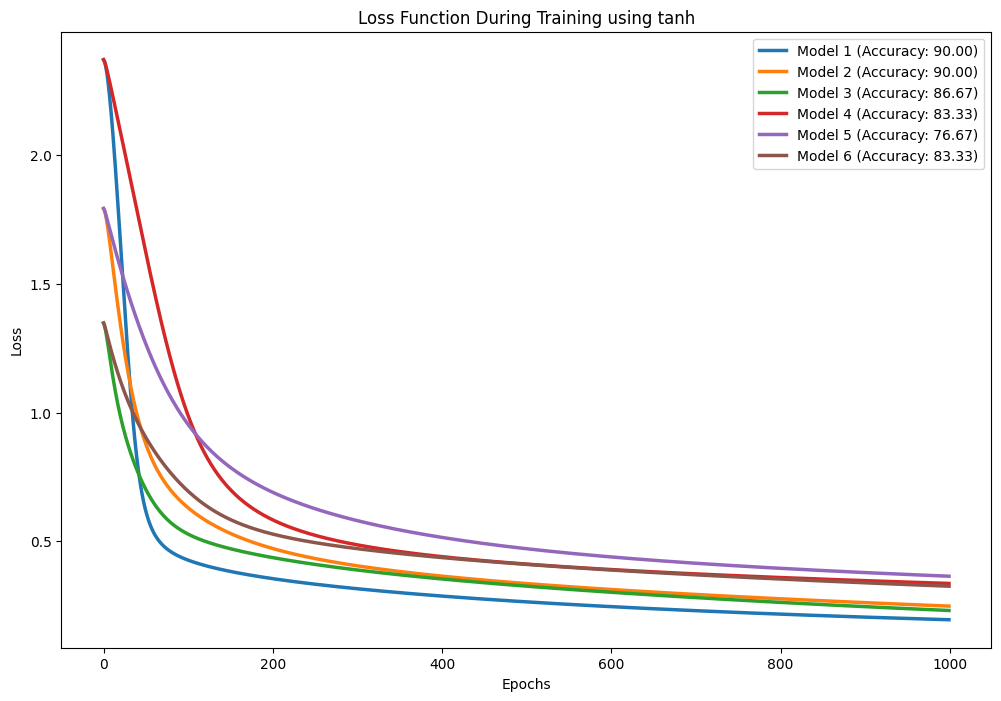

Grid Search for Activation Function: linear
Training model 1 with parameters: {'layers': [4, 32, 3], 'learning_rate': 0.005, 'momentum': 0.9}
Training model 2 with parameters: {'layers': [4, 16, 3], 'learning_rate': 0.01, 'momentum': 0.8}
Training model 3 with parameters: {'layers': [4, 8, 3], 'learning_rate': 0.02, 'momentum': 0.7}
Training model 4 with parameters: {'layers': [4, 32, 3], 'learning_rate': 0.005, 'momentum': 0.6}
Training model 5 with parameters: {'layers': [4, 16, 3], 'learning_rate': 0.01, 'momentum': 0.5}
Training model 6 with parameters: {'layers': [4, 8, 3], 'learning_rate': 0.02, 'momentum': 0.4}


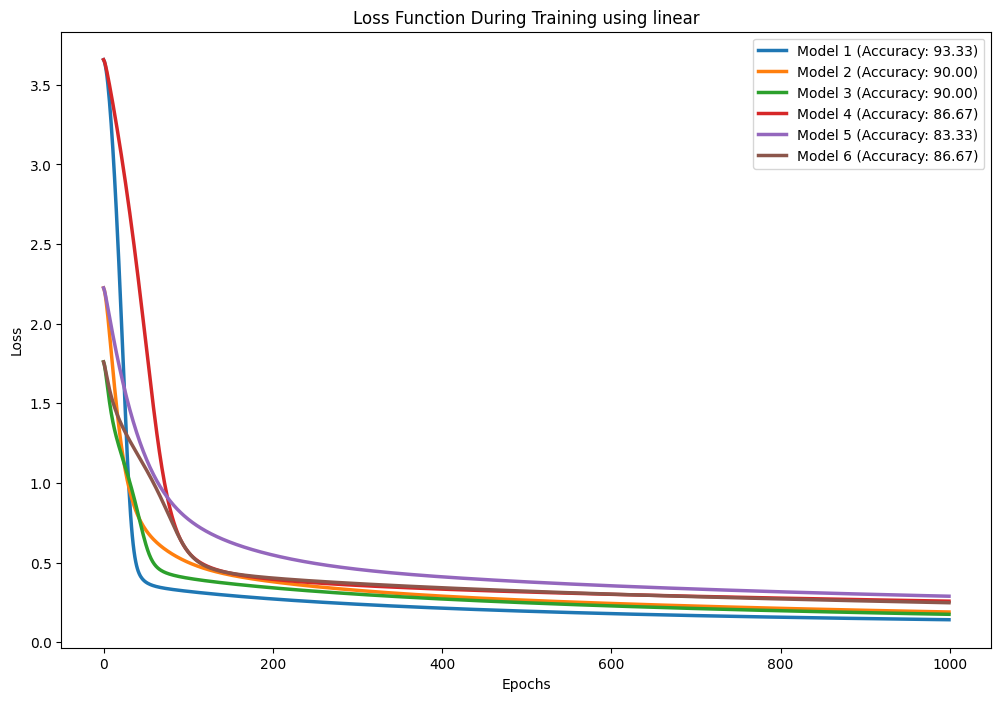

Grid Search for Activation Function: softmax
Training model 1 with parameters: {'layers': [4, 32, 3], 'learning_rate': 0.005, 'momentum': 0.9}
Training model 2 with parameters: {'layers': [4, 16, 3], 'learning_rate': 0.01, 'momentum': 0.8}
Training model 3 with parameters: {'layers': [4, 8, 3], 'learning_rate': 0.02, 'momentum': 0.7}
Training model 4 with parameters: {'layers': [4, 32, 3], 'learning_rate': 0.005, 'momentum': 0.6}
Training model 5 with parameters: {'layers': [4, 16, 3], 'learning_rate': 0.01, 'momentum': 0.5}
Training model 6 with parameters: {'layers': [4, 8, 3], 'learning_rate': 0.02, 'momentum': 0.4}


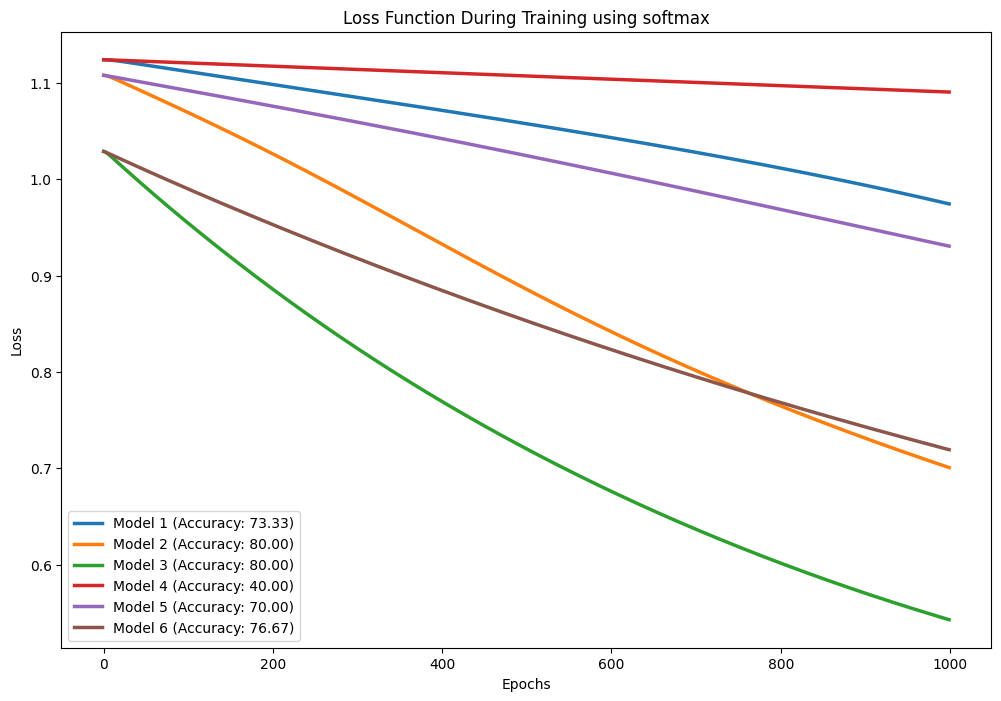

In [116]:
grid_train_mlp_classification('relu') # Realiza a treino em grade para a função de ativação relu 
grid_train_mlp_classification('sigmoid') # Realiza a treino em grade para a função de ativação sigmoid
grid_train_mlp_classification('tanh') # Realiza a treino em grade para a função de ativação tanh
grid_train_mlp_classification('linear') # Realiza a treino em grade para a função de ativação linear
grid_train_mlp_classification('softmax') # Realiza a treino em grade para a função de ativação softmax       

# Análise dos Resultados de Treinamento

## Impacto Geral das Funções de Ativação
- **ReLU** e **Tanh** apresentam melhor desempenho em termos de perda e acurácia final.
- **Softmax** tem a pior convergência e resultados mais baixos, não sendo ideal como função de ativação intermediária.
- **Sigmoid** converge mais lentamente devido ao problema de gradiente desaparecendo.

---

## Análise por Função de Ativação

### Linear
- **Acurácia**: Model 1 alcança a melhor acurácia (93.33%).
- **Comportamento**: Perda estabiliza após ~200 épocas, boa para dados linearmente separáveis.

### ReLU
- **Acurácia**: Modelos 2 e 3 atingem 93.33%.
- **Comportamento**: Convergência rápida e estável, sendo a função mais recomendada.

### Sigmoid
- **Acurácia**: Modelos 1 e 2 alcançam 86.67%.
- **Comportamento**: Convergência lenta devido a gradiente desaparecendo.

### Softmax
- **Acurácia**: Varia entre 40.00% (Model 4) e 80.00% (Modelos 2 e 3).
- **Comportamento**: Perda permanece alta, desempenho geral fraco.

### Tanh
- **Acurácia**: Modelos 1 e 2 atingem 90.00%.
- **Comportamento**: Convergência similar à ReLU, com leve desaceleração.

---

## Parâmetros do Modelo

### Número de Camadas
- Modelos mais profundos (e.g., Modelos 1 e 2) capturam melhor as características do conjunto de dados.

### Learning Rate
- Taxas moderadas (e.g., 0.01) oferecem equilíbrio entre velocidade de convergência e estabilidade.

### Momentum
- Momentos mais altos (e.g., 0.9) melhoram a velocidade de convergência, mas podem causar instabilidade.

---




# Visão Geral do Dataset: Housing Dataset

## Informações Gerais
- **Número de Linhas**: 5000
- **Número de Colunas**: 5
- **Nomes das Colunas**:
  - `Avg. Area Income`
  - `Avg. Area House Age`
  - `Avg. Area Number of Rooms`
  - `Avg. Area Number of Bedrooms`
  - `Area Population`
- **Tipos de Dados**:
  - `Avg. Area Income`: Float
  - `Avg. Area House Age`: Float
  - `Avg. Area Number of Rooms`: Float
  - `Avg. Area Number of Bedrooms`: Float
  - `Area Population`: Float

## Qualidade dos Dados
- **Valores Ausentes**:
  - Nenhuma coluna contém valores ausentes.

## Estatísticas Descritivas
| Coluna                     | Média        | Desvio Padrão | Mínimo       | 25%          | Mediana      | 75%          | Máximo       |
|----------------------------|--------------|---------------|--------------|--------------|--------------|--------------|--------------|
| Avg. Area Income           | 68583.11     | 10657.99      | 17796.63     | 61480.56     | 68804.29     | 75783.34     | 107701.75    |
| Avg. Area House Age        | 5.98         | 0.99          | 2.64         | 5.32         | 5.97         | 6.65         | 9.52         |
| Avg. Area Number of Rooms  | 6.99         | 1.01          | 3.24         | 6.30         | 7.00         | 7.67         | 10.76        |
| Avg. Area Number of Bedrooms | 3.98       | 1.23          | 2.00         | 3.14         | 4.05         | 4.49         | 6.50         |
| Area Population            | 36163.52     | 9925.65       | 172.61       | 29403.93     | 36199.41     | 42861.29     | 69621.71     |

## Resumo
O dataset contém informações socioeconômicas e demográficas de uma área específica. Ele está limpo, sem valores ausentes, e apresenta variação significativa em todas as colunas, o que pode ser útil para análises. As medidas estatísticas fornecem uma visão detalhada das distribuições dos dados.


In [117]:
df = pd.read_csv('housing.csv') # Carrega o dataset
df = df.drop(['Address'], axis=1) # Remove a coluna Address
df.info() # Mostra informações sobre o dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [118]:
X = df.iloc[:, :-1].values # Pega os valores das features
y = df.iloc[:, -1].values.reshape(1, -1).T # Pega os valores dos labels

print(X.shape) # Mostra a forma de X
print(y.shape) # Mostra a forma de y

(5000, 5)
(5000, 1)


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Divide o dataset em treino e teste
scaler = MinMaxScaler() # Inicializa o normalizador
X_train = scaler.fit_transform(X_train) # Normaliza os dados de treino
X_test = scaler.transform(X_test) # Normaliza os dados de teste
y_train = scaler.fit_transform(y_train) # Normaliza os labels de treino
y_test = scaler.transform(y_test) # Normaliza os labels de teste

print(X_train.shape) # Mostra a forma de X_train
print(X_test.shape) # Mostra a forma de X_test
print(y_train.shape) # Mostra a forma de y_train
print(y_test.shape) # Mostra a forma de y_test

(4000, 5)
(1000, 5)
(4000, 1)
(1000, 1)


In [120]:
# Treino do modelo para regressão para verificar se a implementação está correta
model = MLP(layers=[5, 8, 1], activation='relu', output_activation='linear', loss_function='mean_squared_error', learning_rate=0.01, momentum=0.9) # Inicializa o modelo para regressão
model.train(X_train.T, y_train.T, epochs=1000, print_loss=True) # Treina o modelo com os dados de treino

Epoch 100/1000, Loss: 0.0083
Epoch 200/1000, Loss: 0.0073
Epoch 300/1000, Loss: 0.0067
Epoch 400/1000, Loss: 0.0062
Epoch 500/1000, Loss: 0.0056
Epoch 600/1000, Loss: 0.0051
Epoch 700/1000, Loss: 0.0046
Epoch 800/1000, Loss: 0.0042
Epoch 900/1000, Loss: 0.0037
Epoch 1000/1000, Loss: 0.0033


In [121]:
# Função para realizar a busca em grade
def grid_train_mlp_regression(grid_activation_function):
    parameter_sets = [ # Define os parâmetros para treinar vários modelos
        {"layers": [5, 32, 1], "learning_rate": 0.005, "momentum": 0.9},
        {"layers": [5, 16, 1], "learning_rate": 0.01, "momentum": 0.8},
        {"layers": [5, 8, 1], "learning_rate": 0.02, "momentum": 0.7},
        {"layers": [5, 32, 1], "learning_rate": 0.005, "momentum": 0.6},
        {"layers": [5, 16, 1], "learning_rate": 0.01, "momentum": 0.5},
        {"layers": [5, 8, 1], "learning_rate": 0.02, "momentum": 0.4}
    ] 

    print(f"Grid Search for Activation Function: {grid_activation_function}") # Imprime a função de ativação

    results = []

    plt.figure(figsize=(12, 8)) # Define o tamanho da figura

    for i, params in enumerate(parameter_sets):
        print(f"Training model {i+1} with parameters: {params}") # Imprime os parâmetros do modelo
        
        model = MLP( # Inicializa o modelo de acordo com os parâmetros definidos
            layers=params["layers"],
            activation=grid_activation_function,
            output_activation="linear", # Função de ativação da última camada para classificação multiclasse
            loss_function="mean_squared_error", # Função de perda para classificação multiclasse
            learning_rate=params["learning_rate"],
            momentum=params["momentum"]
        )
        
        model.train(X_train.T, y_train.T, epochs=100, print_loss=False) # Treina o modelo
        
        y_pred = model.predict(X_test.T) # Faz a predição
        epsilon = 1e-10 # Valor pequeno para evitar divisão por zero
        final_MAPE = np.mean(np.abs((y_test.T - y_pred) / y_test.T + epsilon)) * 100 # Calcula a acurácia
        
        results.append({ # Armazena os resultados
            "parameters": params,
            "loss_history": model.loss_history,
            "final_MAPE": final_MAPE
        })
        
        plt.plot(model.loss_history, label=f"Model {i+1} (MAPE: {final_MAPE:.2f})", linewidth=2.5) # Plota o histórico de perda

    plt.title("Loss Function During Training using " + grid_activation_function) # Título do gráfico
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show() # Mostra o gráfico

Grid Search for Activation Function: relu
Training model 1 with parameters: {'layers': [5, 32, 1], 'learning_rate': 0.005, 'momentum': 0.9}
Training model 2 with parameters: {'layers': [5, 16, 1], 'learning_rate': 0.01, 'momentum': 0.8}
Training model 3 with parameters: {'layers': [5, 8, 1], 'learning_rate': 0.02, 'momentum': 0.7}
Training model 4 with parameters: {'layers': [5, 32, 1], 'learning_rate': 0.005, 'momentum': 0.6}
Training model 5 with parameters: {'layers': [5, 16, 1], 'learning_rate': 0.01, 'momentum': 0.5}
Training model 6 with parameters: {'layers': [5, 8, 1], 'learning_rate': 0.02, 'momentum': 0.4}


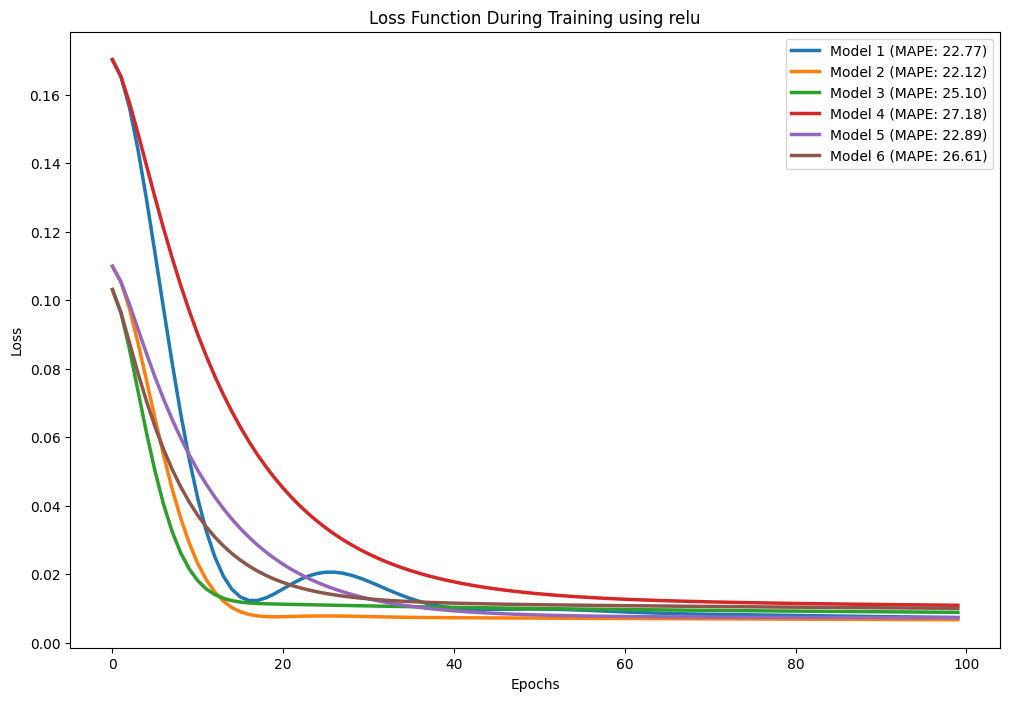

Grid Search for Activation Function: sigmoid
Training model 1 with parameters: {'layers': [5, 32, 1], 'learning_rate': 0.005, 'momentum': 0.9}
Training model 2 with parameters: {'layers': [5, 16, 1], 'learning_rate': 0.01, 'momentum': 0.8}
Training model 3 with parameters: {'layers': [5, 8, 1], 'learning_rate': 0.02, 'momentum': 0.7}
Training model 4 with parameters: {'layers': [5, 32, 1], 'learning_rate': 0.005, 'momentum': 0.6}
Training model 5 with parameters: {'layers': [5, 16, 1], 'learning_rate': 0.01, 'momentum': 0.5}
Training model 6 with parameters: {'layers': [5, 8, 1], 'learning_rate': 0.02, 'momentum': 0.4}


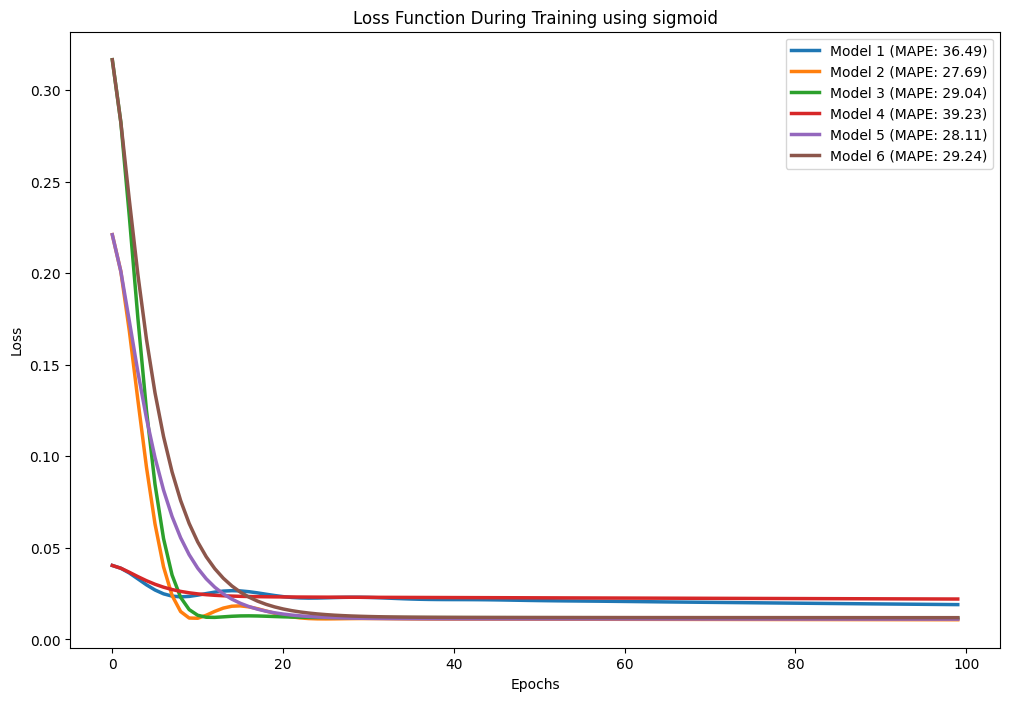

Grid Search for Activation Function: tanh
Training model 1 with parameters: {'layers': [5, 32, 1], 'learning_rate': 0.005, 'momentum': 0.9}
Training model 2 with parameters: {'layers': [5, 16, 1], 'learning_rate': 0.01, 'momentum': 0.8}
Training model 3 with parameters: {'layers': [5, 8, 1], 'learning_rate': 0.02, 'momentum': 0.7}
Training model 4 with parameters: {'layers': [5, 32, 1], 'learning_rate': 0.005, 'momentum': 0.6}
Training model 5 with parameters: {'layers': [5, 16, 1], 'learning_rate': 0.01, 'momentum': 0.5}
Training model 6 with parameters: {'layers': [5, 8, 1], 'learning_rate': 0.02, 'momentum': 0.4}


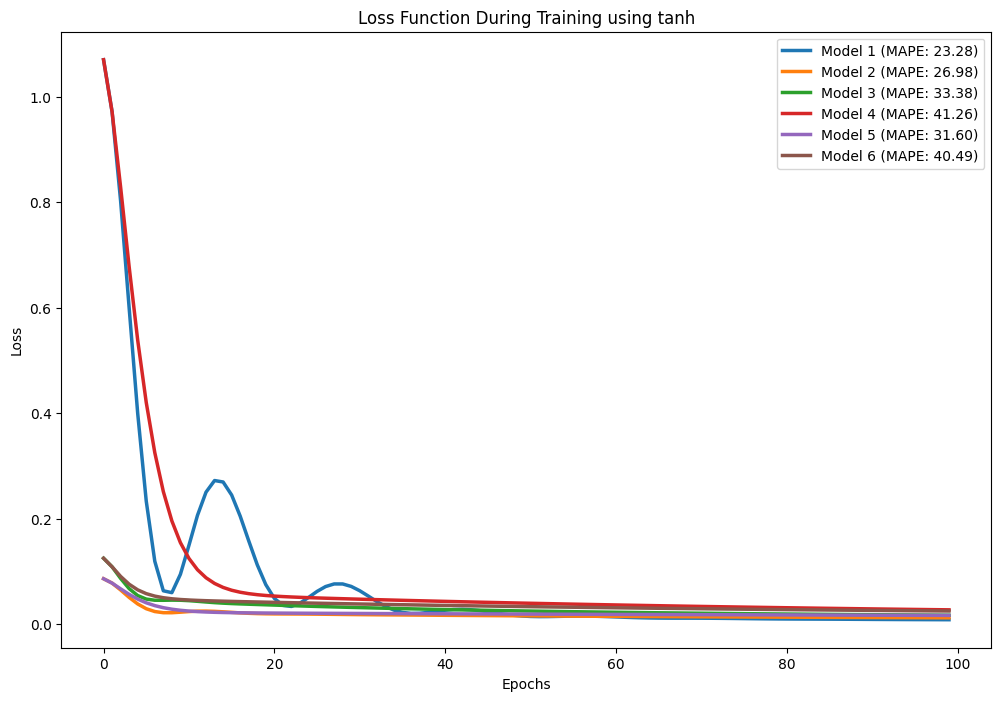

Grid Search for Activation Function: linear
Training model 1 with parameters: {'layers': [5, 32, 1], 'learning_rate': 0.005, 'momentum': 0.9}
Training model 2 with parameters: {'layers': [5, 16, 1], 'learning_rate': 0.01, 'momentum': 0.8}
Training model 3 with parameters: {'layers': [5, 8, 1], 'learning_rate': 0.02, 'momentum': 0.7}
Training model 4 with parameters: {'layers': [5, 32, 1], 'learning_rate': 0.005, 'momentum': 0.6}
Training model 5 with parameters: {'layers': [5, 16, 1], 'learning_rate': 0.01, 'momentum': 0.5}
Training model 6 with parameters: {'layers': [5, 8, 1], 'learning_rate': 0.02, 'momentum': 0.4}


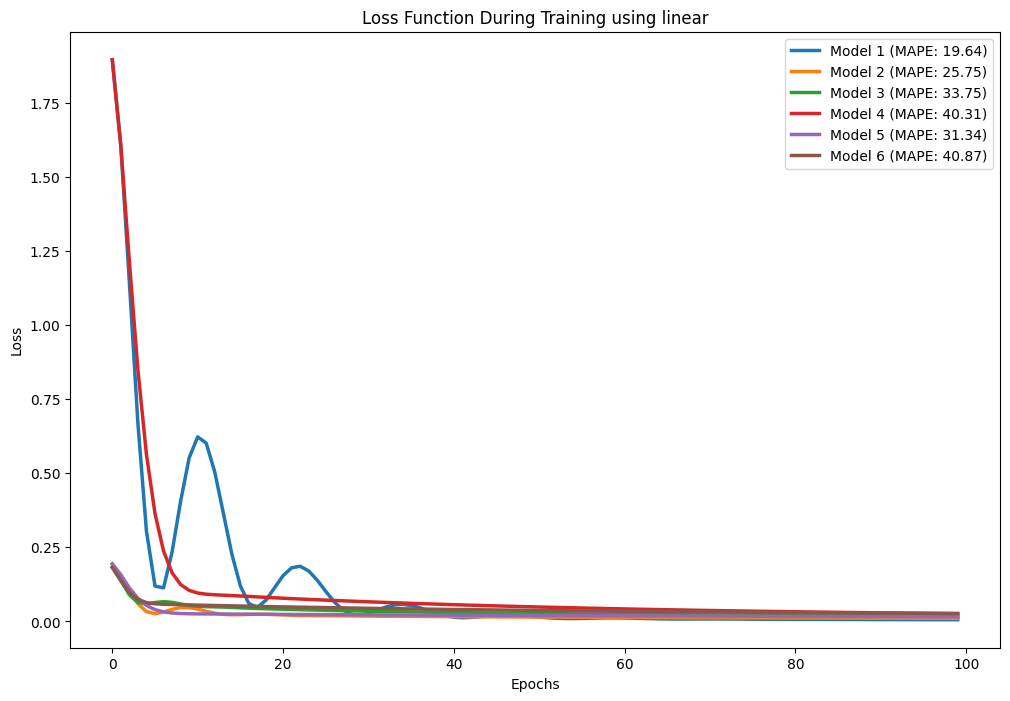

Grid Search for Activation Function: softmax
Training model 1 with parameters: {'layers': [5, 32, 1], 'learning_rate': 0.005, 'momentum': 0.9}
Training model 2 with parameters: {'layers': [5, 16, 1], 'learning_rate': 0.01, 'momentum': 0.8}
Training model 3 with parameters: {'layers': [5, 8, 1], 'learning_rate': 0.02, 'momentum': 0.7}
Training model 4 with parameters: {'layers': [5, 32, 1], 'learning_rate': 0.005, 'momentum': 0.6}
Training model 5 with parameters: {'layers': [5, 16, 1], 'learning_rate': 0.01, 'momentum': 0.5}
Training model 6 with parameters: {'layers': [5, 8, 1], 'learning_rate': 0.02, 'momentum': 0.4}


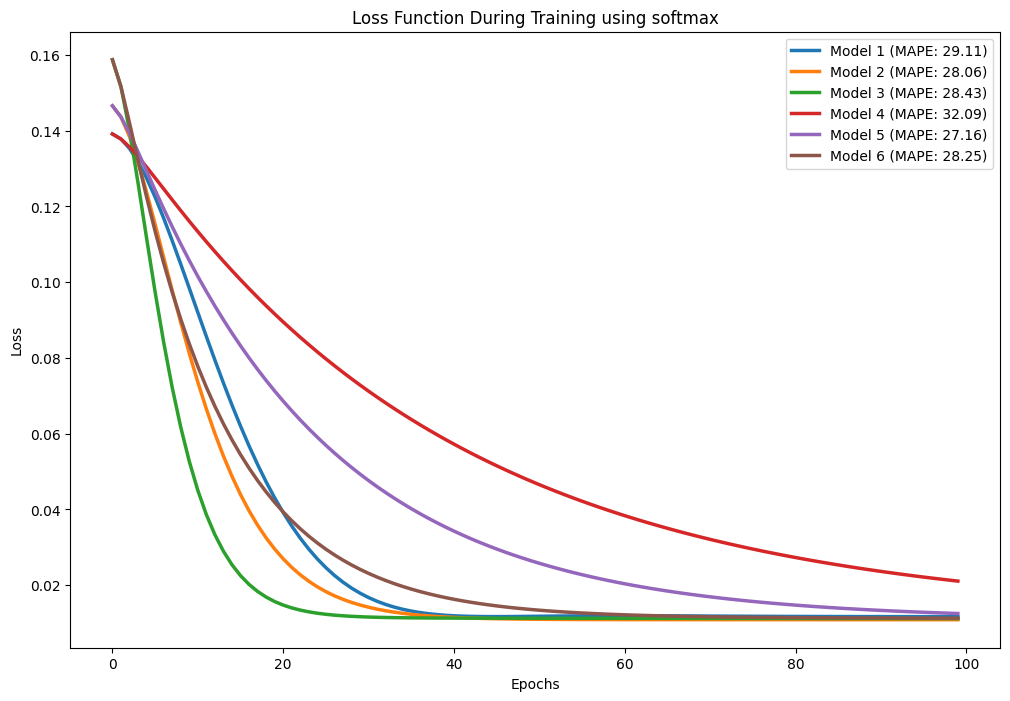

In [122]:
grid_train_mlp_regression('relu') # Realiza a treino em grade para a função de ativação relu 
grid_train_mlp_regression('sigmoid') # Realiza a treino em grade para a função de ativação sigmoid
grid_train_mlp_regression('tanh') # Realiza a treino em grade para a função de ativação tanh
grid_train_mlp_regression('linear') # Realiza a treino em grade para a função de ativação linear
grid_train_mlp_regression('softmax') # Realiza a treino em grade para a função de ativação softmax    

# Análise dos Gráficos e Conclusões

## Função de Ativação: Linear
- **Melhor Modelo**: Model 1 (MAPE: 19.64%).
- **Pior Modelo**: Model 6 (MAPE: 40.87%).
- **Conclusão**: Adequada para tarefas de regressão simples, com rápida convergência (~20 épocas).

---

## Função de Ativação: ReLU
- **Melhor Modelo**: Model 2 (MAPE: 22.12%).
- **Pior Modelo**: Model 4 (MAPE: 27.18%).
- **Conclusão**: Funciona bem para regressão, com estabilidade e convergência eficiente.

---

## Função de Ativação: Sigmoid
- **Melhor Modelo**: Model 2 (MAPE: 27.69%).
- **Pior Modelo**: Model 1 (MAPE: 36.49%).
- **Conclusão**: Desempenho moderado, limitado pelo problema de gradiente desaparecendo.

---

## Função de Ativação: Softmax
- **Melhor Modelo**: Model 5 (MAPE: 27.16%).
- **Pior Modelo**: Model 4 (MAPE: 32.09%).
- **Conclusão**: Não ideal para regressão, mas pode funcionar dependendo dos dados.

---

## Função de Ativação: Tanh
- **Melhor Modelo**: Model 1 (MAPE: 23.28%).
- **Pior Modelo**: Model 6 (MAPE: 40.49%).
- **Conclusão**: Boa opção para dados centrados, mas apresenta maior variação entre modelos.

---

## Comparação Geral
1. **Melhores Funções de Ativação**:
   - **ReLU** e **Linear** apresentam os menores valores de MAPE e melhor estabilidade.
2. **Impacto dos Parâmetros**:
   - Modelos com mais camadas intermediárias e `momentum` alto (e.g., Model 1 e Model 2) apresentam desempenho superior.
3. **Recomendações**:
   - Priorizar **ReLU** ou **Linear** para tarefas de regressão.
   - Ajustar **learning_rate** e **momentum** para reduzir MAPE.